<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/ximen_20250723_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
1. pytorch
2. tensorflow
```



In [13]:
from tensorflow.keras.datasets import mnist
# [[x_train, y_train], [x_test, y_test]]
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

In [14]:
# 看到array: numpy array
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


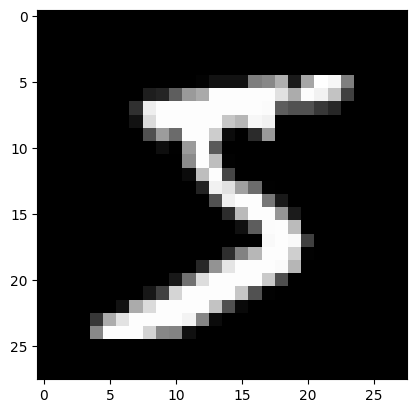

In [16]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# cmap反過來: _r
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [17]:
# 先建立地基: Sequential(一層一層), Model(彈性)
from tensorflow.keras.models import Sequential
# 每一層: Layer  Dense Layer: 全連接層
from tensorflow.keras.layers import Dense

layers = [
    # 緩解梯度消失: 只要不是最後一層: act: relu
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [19]:
# 5 -> 0 0 0 0 0 1 0 0 0 0
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
# demo: numpy reshape
import numpy as np
n = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
n.reshape(3, 2)
n.reshape(-1, 2)
n.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
# 攤平
# 每個框架對於x輸入其實有個建議數值
# 因為框架是根據建議數值範圍來隨機係數的
# tensorflow/torch: -1~1 0~1(先用這個) 兩種
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [ ]:
# batch_size: 你看多少筆資料才實行一次梯度下降
# epochs: 整份資料看幾輪(防止過擬合)
# 真實訓練: 54000(60000-6000)
# 什麼都沒改: 30epochs: 訓練好 95%
# / 255.0  : 60epochs:       97%
# relu:    : 30epochs:       97.8%
# mse->crossentropy: 10 epochs: 97.9%
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    EarlyStopping(patience=5),
    ModelCheckpoint("mnist.keras", save_best_only=True)
]

model.fit(x=x_train_norm,
          y=y_train_cat,
          batch_size=100,
          epochs=100,
          validation_split=0.1,
          callbacks=c)

Epoch 1/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8483 - loss: 0.5536 - val_accuracy: 0.9557 - val_loss: 0.1614
Epoch 2/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9483 - loss: 0.1802 - val_accuracy: 0.9660 - val_loss: 0.1135
Epoch 3/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9662 - loss: 0.1181 - val_accuracy: 0.9730 - val_loss: 0.0922
Epoch 4/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9729 - loss: 0.0907 - val_accuracy: 0.9735 - val_loss: 0.0874
Epoch 5/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9792 - loss: 0.0727 - val_accuracy: 0.9767 - val_loss: 0.0868
Epoch 6/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9839 - loss: 0.0562 - val_accuracy: 0.9775 - val_loss: 0.0781
Epoch 7/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9863 - loss: 0.0477 - val_accuracy: 0.9785 - val_loss: 0.0730
Epoch 8/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accu

In [ ]:
model.evaluate(x_test_norm, y_test_cat)